### Projeto Game Sales
#### Link do Dataset: https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings
#### Objetivo: construir um painel de uma página com as métricas mais relevantes.
#### Dicionário de Dados:
* Name: Name of the game
* Platform: Console on which the game is running
* Year_of_Release: Year of the game released
* Genre: Game's category
* Publisher: Publisher
* NA_Sales: Game sales in North America (in millions of units)
* EU_Sales: Game sales in the European Union (in millions of units)
* JP_Sales: Game sales in Japan (in millions of units)
* Other_Sales: Game sales in the rest of the world, i.e. Africa, Asia excluding Japan, Australia, Europe excluding the E.U. and South America (in millions of units)
* Global_Sales: Total sales in the world (in millions of units)
* Critic_Score: Aggregate score compiled by Metacritic staff
* Criti_Count: The number of critics used in coming up with the Criticscore
* User_Score: Score by Metacritic's subscribers
* User_Count: Number of users who gave the userscore
* Developer: Party responsible for creating the game
* Rating: The ESRB ratings

#### Observação quanto aos ratings encontrados no dataset que estão no link da ESRB:
* E: Everyone
* E10+: Everyone 10+
* T: Teen (13+)
* M: Mature (17+)
* AO: Adults Only (18+)
* RP: Rating Pending
* K-A: renamed "Everyone" in 1998 (https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board)

#### Referência: https://www.esrb.org/ratings-guide/

### 1) Bibliotecas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 2) Exploração de Dados:

In [2]:
# Importação do dataset
df = pd.read_csv(f'./data/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
# 5 primeiras linhas
# É possível observar que Plataform e Developer representam a mesma informação, vou remover a que tem menos linhas
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Linhas e Colunas
df.shape

(16719, 16)

In [5]:
# Estrutura de cada coluna e quantidade de valores faltantes em comparação com a quantidade de linhas (16719)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


##### Year_of_Release

In [6]:
# Verificando quantos valores nulos têm e a forma como estão distribuídos para escolher o critério de substituição

# df['Year_of_Release'].isnull().sum()
# df['Year_of_Release'].describe()

df['Year_of_Release'].fillna(df['Year_of_Release'].median(),inplace=True)
df['Year_of_Release'] = df['Year_of_Release'].astype(np.int64, copy=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16719 non-null  int64  
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(8), int64(1), object(7)
memory usage: 2.0+ MB


##### User_Score

In [8]:
df['User_Score'].describe()

count     10015
unique       96
top         tbd
freq       2425
Name: User_Score, dtype: object

In [9]:
df = df.drop(df[df['User_Score'] == 'tbd'].index)
df['User_Score'] = df['User_Score'].astype(float)
df['User_Score'].fillna(df['User_Score'].median(),inplace=True)

In [10]:
df['User_Score'].describe()

count    14294.000000
mean         7.300902
std          1.108911
min          0.000000
25%          7.400000
50%          7.500000
75%          7.600000
max          9.700000
Name: User_Score, dtype: float64

##### Critic_Score

In [11]:
df['Critic_Score'].fillna(df['Critic_Score'].median(),inplace=True)

In [12]:
df['Critic_Score'].describe()

count    14294.000000
mean        71.128306
std          9.794826
min         13.000000
25%         72.000000
50%         72.000000
75%         72.000000
max         98.000000
Name: Critic_Score, dtype: float64

##### Rating

In [13]:
print(f'Quantidade de valores nulos: {df["Rating"].isnull().sum()}')
print(f'Quantidade de ratings para cada classificação:\n{df["Rating"].value_counts()}')

Quantidade de valores nulos: 6719
Quantidade de ratings para cada classificação:
T       2581
E       2415
M       1521
E10+    1050
K-A        3
RP         3
AO         1
EC         1
Name: Rating, dtype: int64


In [14]:
# K-A passou a ser E a partir de 1998 (link da explicação no início)

df.loc[df['Rating'] == 'K-A','Rating'] = 'E'

In [15]:
# Vou remover os EC, RP e AO por aparecerem poucas vezes

df['Rating'].value_counts()

T       2581
E       2418
M       1521
E10+    1050
RP         3
AO         1
EC         1
Name: Rating, dtype: int64

In [16]:
# Remoção de algumas colunas que não vou utilizar neste case

df.drop(['User_Count','Developer','Critic_Count'],axis=1,inplace=True)

In [17]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,72.0,7.5,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,72.0,7.5,NaN


##### Correlação

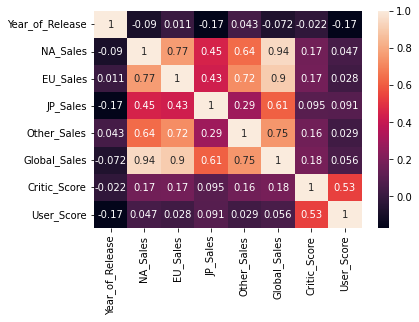

In [18]:
# Preciso segmentar o dataset para evitar colinearidade

corr_df = df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_df, annot=True)
plt.show()

### 3) Análise Segmentada
* Resolvi focar nas 3 principais regiões

##### 3.1) NA_Sales

In [19]:
print('Top 10 Plataformas(América do Norte):\n')
print(df[['Platform', 'NA_Sales']].groupby('Platform').sum().sort_values(by='NA_Sales', ascending= False).head(10))

Top 10 Plataformas(América do Norte):

          NA_Sales
Platform          
X360        592.50
PS2         553.91
Wii         421.90
PS3         387.16
PS          328.92
DS          279.93
XB          174.20
GBA         151.22
N64         139.02
NES         125.94


In [20]:
print('Top 10 Gêneros de Games(América do Norte):\n')
print(df[['Genre', 'NA_Sales']].groupby('Genre').sum().sort_values(by='NA_Sales', ascending= False).head(10))

Top 10 Gêneros de Games(América do Norte):

              NA_Sales
Genre                 
Action          833.09
Sports          628.66
Shooter         586.66
Platform        426.98
Misc            339.51
Racing          335.37
Role-Playing    328.56
Fighting        219.84
Simulation      143.11
Puzzle          102.40


In [21]:
print('Top 10 Fabricantes(América do Norte):\n')
print(df[['Publisher', 'NA_Sales']].groupby('Publisher').sum().sort_values(by='NA_Sales', ascending= False).head(10))

Top 10 Fabricantes(América do Norte):

                             NA_Sales
Publisher                            
Nintendo                       813.86
Electronic Arts                578.08
Activision                     398.49
Sony Computer Entertainment    260.49
Ubisoft                        214.72
Take-Two Interactive           213.53
THQ                            167.46
Microsoft Game Studios         156.64
Sega                           105.83
Atari                          104.87


In [22]:
print('Classificações mais consumidas(América do Norte):\n')
print(df[['Rating', 'NA_Sales']].groupby('Rating').sum().sort_values(by='NA_Sales', ascending= False))

Classificações mais consumidas(América do Norte):

        NA_Sales
Rating          
E        1071.95
M         745.49
T         725.30
E10+      312.76
AO          1.26
EC          0.12
RP          0.00


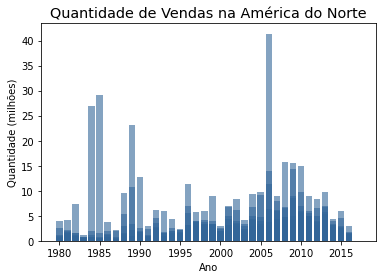

In [23]:
x = df['Year_of_Release']
y = df['NA_Sales']

plt.bar(x,y,color=(0.2, 0.4, 0.6, 0.6))

plt.style.use('ggplot')
width = 0.4

plt.xlabel('Ano')
plt.ylabel('Quantidade (milhões)')


plt.title('Quantidade de Vendas na América do Norte')

plt.show()

##### 3.2) EU_Sales

In [24]:
print('Top 10 Plataformas(Europa):\n')
print(df[['Platform', 'EU_Sales']].groupby('Platform').sum().sort_values(by='EU_Sales', ascending= False).head(10))

Top 10 Plataformas(Europa):

          EU_Sales
Platform          
PS3         327.96
PS2         316.99
X360        269.18
Wii         245.05
PS          208.49
DS          157.69
PC          141.36
PS4         141.09
PSP          63.42
GBA          61.46


In [25]:
print('Top 10 Gêneros de Games(Europa):\n')
print(df[['Genre', 'EU_Sales']].groupby('Genre').sum().sort_values(by='EU_Sales', ascending= False).head(10))

Top 10 Gêneros de Games(Europa):

              EU_Sales
Genre                 
Action          502.54
Sports          357.48
Shooter         315.74
Racing          228.58
Platform        192.91
Misc            191.30
Role-Playing    188.16
Simulation      101.99
Fighting         98.65
Adventure        55.40


In [26]:
print('Top 10 Fabricantes(Europa):\n')
print(df[['Publisher', 'EU_Sales']].groupby('Publisher').sum().sort_values(by='EU_Sales', ascending= False).head(10))

Top 10 Fabricantes(Europa):

                              EU_Sales
Publisher                             
Nintendo                        416.20
Electronic Arts                 365.14
Activision                      206.71
Sony Computer Entertainment     181.21
Ubisoft                         147.55
Take-Two Interactive            116.91
THQ                              80.13
Sega                             79.51
Microsoft Game Studios           68.32
Konami Digital Entertainment     65.14


In [27]:
print('Classificações mais consumidas(Europa):\n')
print(df[['Rating', 'EU_Sales']].groupby('Rating').sum().sort_values(by='EU_Sales', ascending= False))

Classificações mais consumidas(Europa):

        EU_Sales
Rating          
E         635.51
M         482.42
T         413.79
E10+      174.30
AO          0.61
EC          0.09
RP          0.08


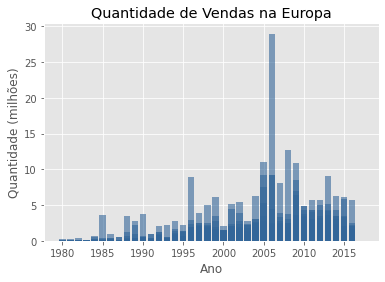

In [28]:
x = df['Year_of_Release']
y = df['EU_Sales']

plt.bar(x,y,color=(0.2, 0.4, 0.6, 0.6))

plt.style.use('ggplot')
width = 0.4

plt.xlabel('Ano')
plt.ylabel('Quantidade (milhões)')


plt.title('Quantidade de Vendas na Europa')

plt.show()

##### 3.3) JP_Sales

In [29]:
print('Top 10 Plataformas(Japão):\n')
print(df[['Platform', 'JP_Sales']].groupby('Platform').sum().sort_values(by='JP_Sales', ascending= False).head(10))

Top 10 Plataformas(Japão):

          JP_Sales
Platform          
DS          172.09
PS          139.82
PS2         138.41
SNES        116.55
3DS         100.44
NES          98.65
GB           85.12
PS3          79.82
PSP          76.46
Wii          68.90


In [30]:
print('Top 10 Gêneros de Games(Japão):\n')
print(df[['Genre', 'JP_Sales']].groupby('Genre').sum().sort_values(by='JP_Sales', ascending= False).head(10))

Top 10 Gêneros de Games(Japão):

              JP_Sales
Genre                 
Role-Playing    355.10
Action          160.15
Sports          134.67
Platform        130.61
Misc            107.40
Fighting         87.39
Simulation       62.46
Puzzle           56.50
Racing           56.40
Adventure        51.82


In [31]:
print('Top 10 Fabricantes(Japão):\n')
print(df[['Publisher', 'JP_Sales']].groupby('Publisher').sum().sort_values(by='JP_Sales', ascending= False).head(10))

Top 10 Fabricantes(Japão):

                              JP_Sales
Publisher                             
Nintendo                        456.88
Namco Bandai Games              126.61
Konami Digital Entertainment     90.94
Sony Computer Entertainment      74.13
Capcom                           68.40
Sega                             57.06
Square Enix                      49.93
SquareSoft                       40.13
Enix Corporation                 32.40
Tecmo Koei                       28.97


In [32]:
print('Classificações mais consumidas(Japão):\n')
print(df[['Rating', 'JP_Sales']].groupby('Rating').sum().sort_values(by='JP_Sales', ascending= False))

Classificações mais consumidas(Japão):

        JP_Sales
Rating          
E         195.66
T         149.79
M          64.23
E10+       39.12
AO          0.00
EC          0.00
RP          0.00


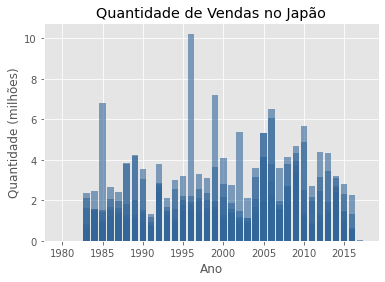

In [33]:
x = df['Year_of_Release']
y = df['JP_Sales']

plt.bar(x,y,color=(0.2, 0.4, 0.6, 0.6))

plt.style.use('ggplot')
width = 0.4

plt.xlabel('Ano')
plt.ylabel('Quantidade (milhões)')


plt.title('Quantidade de Vendas no Japão')

plt.show()

### 4) Exportação do CSV para o Power BI

In [34]:
df.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,72.0,7.5,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E


In [35]:
dfFinal = df.drop(['Other_Sales','Global_Sales'],axis=1)

In [36]:
dfFinal.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,72.0,7.5,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,82.0,8.3,E


In [37]:
dfFinal.to_csv('./data/data.csv',index=False)